## Energy Expenditure Analysis

In the coming couple of months, I will be moving to a new home and as such,
will be switching a number of resource providers. Everyone loves to save
money, so I decided to see where I could cut costs. My new home has access to
three different providers\*: [__TXU__][1], [__Reliant__][2], and
[__GreenMountain__][3]. Of these three, TXU seems to offer the most attractive
pricing and flexible plans.. however they also offer distinct benefits for
each of their plans! The analysis I undergo below will help me determine
which plan is best to choose based on my own energy needs.

It's important to note that my new home and current home share relatively the
same setup. They're both roughly the same size, in the same climate, at the
same elevation, and can be taken to be fairly identical in terms of my planned
usage at the new place.

\* *It actually appears* there are a few cheaper, fixed-rate budget
providers, so I chose the cheapest one I could find to stack up against
TXU. I'm skeptical that they all service my new home however, so we'll just 
choose one for grins, and if it's the best option *and* available then it's a
win-win!

[1]: https://www.txu.com/residential/plans-offers.aspx
[2]: https://www.reliant.com/en/public/apartment-electricity.jsp
[3]: https://www.greenmountainenergy.com/

### TXU Energy Plans

---

The plans I am considering from TXU are the following. They
each offer some form of benefit, and rates are fixed based on
what tier of energy usage you reach in a given month.

| ID  | Plan Name              | Term   | Benefit *                |
| --- | ---------------------- | ------ | ------------------------ |
| 1   | Season Pass 12         | 12+    | 50% off in summer/winter |
| 2   | Free Nights 12         | 12+    | Free Nights              |
| 3   | Texas Choice 12        | 12+    | 3% Cash Back EOY         |
| 4   | e-Saver 10             | 10+    | N/A - Fixed Rate         |
| 5   | Value Edge 12          | 12+    | >800 kWh, $30 discount   |
| 6   | Discount Power Easy 12 | 12+    | N/A - Fixed Rate         |

---

Since rates are tiered, it's necessary to gauge costs on a
month by month basis, even possibly by-hour given that
Free Nights 12 discounts usage within a given timeframe.

| Plan ID | Usage (kWh) | Rate (kWh) |
| :-----: | ----------: | ---------: |
| 1       |  500        | 14.8       |
| 1       | 1000        | 13.5       |
| 1       | 2000        | 12.8       |
| 2       |  500        | 14.8       |
| 2       | 1000        | 13.5       |
| 2       | 2000        | 12.8       |
| 3       |  500        | 14.5       |
| 3       | 1000        | 13.2       |
| 3       | 2000        | 12.5       |
| 4       |  500        | 11.9       |
| 4       | 1000        | 10.9       |
| 4       | 2000        | 11.8       |
| 5       |  500        | 12.7       | 
| 5       | 1000        |  8.4       |
| 5       | 2000        | 10.9       |
| 6       |  500        | 10.8       |
| 6       | 1000        |  7.6       |
| 6       | 2000        | 13.5       |

---

```
* Benefits Explanations

1: Season Pass 12
50% off energy charges applies to Dec/Jan/Feb and Jun/Jul/Aug bills.

2: Free Nights 12
Free electricity at night applies to per kWh usage charges between 9 p.m.
    and 6 a.m. every day for 12 full months. A provisioned smart meter is
    required.

3: 3% EOY Cash Back
Payable by the end of February for the previous calendar year. Reward is
    based on 3% of electricity consumption actually billed to and paid for
    by customer. Reward is fulfilled with a Visa® prepaid card.

5. $30 Discount
To be eligible for the $30 discount, you must use at least 800 kWh.
```

---

---

---

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Jupyter magic method to display graphics inline
%matplotlib inline
# pandas func to show dataframes expanded
pd.set_option('display.expand_frame_repr', False)

### Structuring Plans into data

In [3]:
plans = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'plan_name': ['Season Pass', 'Free Nights', 'Texas Choice', 'e-Saver', 'Value Edge', 'DP Easy 12'],
    'min_term': [12, 12, 12, 10, 12, 12],
    'benefit': ['50% off summer & winter', '9pm-6am free', '3% cash back', 'fixed rate', '$30 discount', 'fixed rate']
})

rates = pd.DataFrame({
    'plan_id': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6],
    'usage': [500, 1000, 2000, 500, 1000, 2000, 500, 1000, 2000, 500, 1000, 2000, 500, 1000, 2000, 500, 1000, 2000],
    'rate': [14.8, 13.5, 12.8, 14.8, 13.5, 12.8, 14.5, 13.2, 12.5, 11.9, 10.9, 11.8, 12.7, 8.4, 10.9, 10.8, 7.6, 13.5]
})

# prettify for the notebook
plans.merge(rates.rename(columns={'plan_id': 'id'}), on='id')\
     .set_index(['id', 'plan_name'])\
     [['min_term', 'rate', 'usage', 'benefit']]

min_term  rate  usage                  benefit
id plan_name                                                   
1  Season Pass         12  14.8    500  50% off summer & winter
   Season Pass         12  13.5   1000  50% off summer & winter
   Season Pass         12  12.8   2000  50% off summer & winter
2  Free Nights         12  14.8    500             9pm-6am free
   Free Nights         12  13.5   1000             9pm-6am free
   Free Nights         12  12.8   2000             9pm-6am free
3  Texas Choice        12  14.5    500             3% cash back
   Texas Choice        12  13.2   1000             3% cash back
   Texas Choice        12  12.5   2000             3% cash back
4  e-Saver             10  11.9    500               fixed rate
   e-Saver             10  10.9   1000               fixed rate
   e-Saver             10  11.8   2000               fixed rate
5  Value Edge          12  12.7    500             $30 discount
   Value Edge          12   8.4   1000             $30 discount
   Value Edge          12  10.9   2000             $30 discount
6  DP Easy 12          12  10.8    500               fixed rate
   DP Easy 12          12   7.6   1000               fixed rate
   DP Easy 12          12  13.5   2000               fixed rate

![co-serv-dash][dashboard]

As a customer, this is the information that CoServ provides you. This is a nice
little tool to see energy usage at a glance, but not very useful on its own
unless you're micromanaging yourself. I feel that it's much more difficult to
change behavior than it is to have your tendencies work FOR you, so let's go
ahead and pull this data and play with it. I simply downloaded it from their
dashboard, and then loaded the CSV into memory.

[dashboard]: ../dashboard.png

In [4]:
df = pd.read_csv('../data/Hour by Day_Usage_2018-04-04.csv')
df.head()

,HourByDay,Meter,'12-1am','1-2','2-3','3-4','4-5','5-6','6-7','7-8',...,'2-3'.1,'3-4'.1,'4-5'.1,'5-6'.1,'6-7'.1,'7-8'.1,'8-9'.1,'9-10'.1,'10-11'.1,'11-12'.1
0,4/3/2018,508065,0.261000007390976,0.256199985742569,0.287999987602234,0.469199985265732,1.17900002002716,0.238800004124641,0.239399999380112,0.370200008153915,...,0.296400010585785,0.296999990940094,0.567600011825562,0.391200006008148,0.549000024795532,0.325200021266937,0.292800009250641,0.30120000243187,0.986999988555908,0.842999994754791
1,4/2/2018,508065,0.534600019454956,0.248999997973442,0.248400002717972,0.24719999730587,0.231000006198883,0.508199989795685,0.244800001382828,0.700800001621246,...,0.52920001745224,1.07819998264313,0.472200006246567,0.401399999856949,0.420000016689301,0.79559999704361,0.518999993801117,0.546599984169006,0.560999989509583,0.346199989318848
2,4/1/2018,508065,0.307799994945526,0.305400013923645,0.306600004434586,0.290399998426437,0.29339998960495,0.296999990940094,0.662400007247925,0.362399995326996,...,0.725400030612946,0.374400019645691,2.13840007781982,1.15020000934601,0.591600000858307,0.829800009727478,0.58380001783371,0.526199996471405,0.352800011634827,0.516000032424927
3,3/31/2018,508065,0.488399982452393,0.469799995422363,0.273000001907349,0.599999964237213,0.259200006723404,0.242399990558624,0.241200000047684,0.254999995231628,...,0.841199994087219,0.360599994659424,0.291599988937378,0.533399999141693,0.290399998426437,0.286799997091293,0.287999987602234,0.301799982786179,0.305999994277954,0.549600005149841
4,3/30/2018,508065,0.571200013160706,0.378000020980835,0.253199994564056,0.490199983119965,0.252600014209747,0.324600011110306,0.32039999961853,0.233999997377396,...,1.52279996871948,0.597000002861023,0.87720000743866,0.535199999809265,0.523800015449524,0.566399991512299,0.856799960136414,0.870599985122681,0.491400003433228,0.433800011873245


Yikes! This is not incredibly friendly, but at least it's standardized. We're
going to clean it up a bit to make it a bit prettier on the eyes.

__Tasks__:
  - Drop unnecessary data
      1. the "Meter" constant is pretty useless for our purposes


  - Impute Missing / non-standard data
      1. "no usage" is denoted as `--`, we'll replace it with `0` instead


  - Clean available data
      NOTE: this data came from a CSV, most values are held as str
      1. convert date strings to actual date values
      2. convert & truncate floats to 4 decimal places
      3. create more meaningful column names

In [5]:
df['date'] = pd.to_datetime(df.HourByDay)

raw_df = df.drop(columns=['Meter', 'HourByDay'])\
           .set_index('date')\
           .replace('--', 0)\
           .applymap(np.float64)\
           .rename(
               columns={
                   c: x
                   for c, x in zip(df.columns.tolist()[2:], range(0, 24))
               })\
            .reset_index()

raw_df.head()

,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2018-04-03,0.2610,0.2562,0.2880,0.4692,1.1790,0.2388,0.2394,0.3702,1.9710,...,0.2964,0.2970,0.5676,0.3912,0.5490,0.3252,0.2928,0.3012,0.9870,0.8430
1,2018-04-02,0.5346,0.2490,0.2484,0.2472,0.2310,0.5082,0.2448,0.7008,2.6508,...,0.5292,1.0782,0.4722,0.4014,0.4200,0.7956,0.5190,0.5466,0.5610,0.3462
2,2018-04-01,0.3078,0.3054,0.3066,0.2904,0.2934,0.2970,0.6624,0.3624,0.3006,...,0.7254,0.3744,2.1384,1.1502,0.5916,0.8298,0.5838,0.5262,0.3528,0.5160
3,2018-03-31,0.4884,0.4698,0.2730,0.6000,0.2592,0.2424,0.2412,0.2550,0.2556,...,0.8412,0.3606,0.2916,0.5334,0.2904,0.2868,0.2880,0.3018,0.3060,0.5496
4,2018-03-30,0.5712,0.3780,0.2532,0.4902,0.2526,0.3246,0.3204,0.2340,0.2454,...,1.5228,0.5970,0.8772,0.5352,0.5238,0.5664,0.8568,0.8706,0.4914,0.4338


Great! So now we have a clean base to work with, where our row-headers are
the date of record, our hours of the day span across the columns, and then
at the intersect is my energy usage in kWh.

Numbers are hard to look at though, let's make this a bit visual to
understand. I'll start by creating a heatmap of energy usage. This is great
plot to visually represent activity.

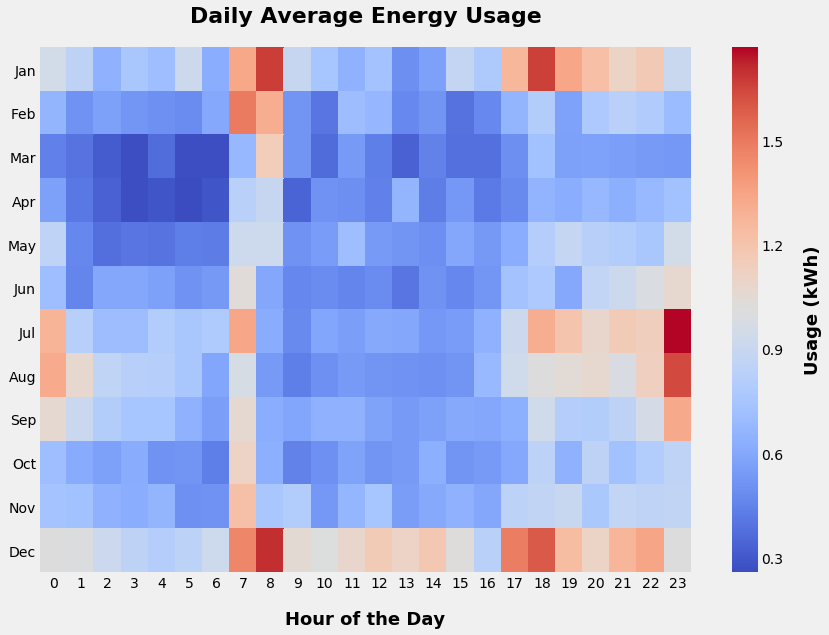

In [6]:
# Leave our source data undisturbed.
df = raw_df.copy()

# Let's look at 2017 as a whole, by month.
df = df[df.date.dt.year == 2017].copy()
df['month'] = df.date.dt.month
df['month_name'] = df.date.apply(lambda x: x.strftime('%b'))

# The 538 graph styles look clean to me without much work.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(13, 9))

# Plot our Figure
ax = sns.heatmap(
    df.groupby(['month', 'month_name']).mean(),
    cmap='coolwarm',
    ax=ax,
)

# Grab a reference to the colorbar. When plotting a single graph like above
#     it's usually going to be the last ax of all the axes. It should be
#     understood that the colorbar is simply another ax!
colorbar = fig.axes[-1]

# Customize the plotted Ax & Colorbar
ax.set_title('Daily Average Energy Usage', pad=25, size=22, weight='bold')
ax.set_ylabel('', labelpad=20, size=18, weight='bold')
ax.set_xlabel('Hour of the Day', labelpad=20, size=18, weight='bold')
ax.set_yticklabels(reversed(df.month_name.unique()))
colorbar.set_ylabel('Usage (kWh)', labelpad=20, size=18, weight='bold')

ax

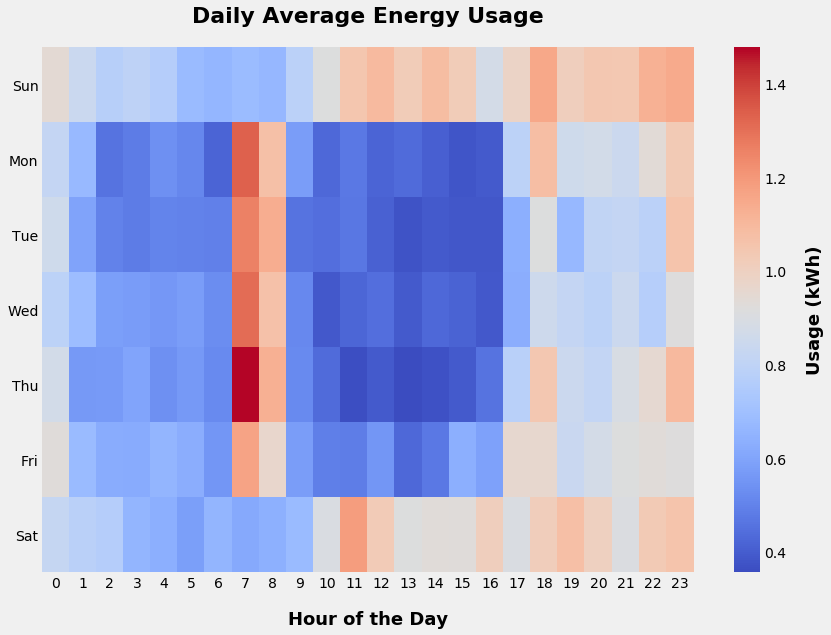

In [7]:
# It's just "good practice" to start from source each time you want to do a
# different view or analysis and since we're not working with millions of
# datapoint heres, we're safe to keep copying and overwriting our frame.
df = raw_df.copy()

# Let's look at it week-by-week this time.
df = df[df.date.dt.year == 2017].copy()
df['dotw'] = df.date.apply(lambda x: x.strftime("%w"))
df['weekday'] = df.date.apply(lambda x: x.strftime('%a'))

# Reset our Figure to defaults
fig, ax = plt.subplots(figsize=(13, 9))

ax = sns.heatmap(
    df.groupby(['dotw', 'weekday']).mean(),
    cmap='coolwarm',
    ax=ax,
)

# Grab a reference to the colorbar. When plotting a single graph like above
#     it's usually going to be the last ax of all the axes. It should be
#     understood that the colorbar is simply another ax!
colorbar = fig.axes[-1]
# Customize the plotted Ax & Colorbar
ax.set_title('Daily Average Energy Usage', pad=25, size=22, weight='bold')
ax.set_ylabel('', labelpad=20, size=18, weight='bold')
ax.set_xlabel('Hour of the Day', labelpad=20, size=18, weight='bold')
ax.set_yticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],  # :~) lazy
                   rotation=0)
colorbar.set_ylabel('Usage (kWh)', labelpad=20, size=18, weight='bold')

ax

So right off the bat, it looks like we can identify a few trends.
1. On weekdays, between the hours of 7:00-8:00am and 9:00-midnight appear to be high
    high usage times.
2. There's a large dip in usage from 9:00am - 5:00pm (work hours!)
3. January, July, August, December appear to be the worst months for energy
    usage throughout the day.

Let's take a look at my overall monthly energy expenditure. This will help me
determine which plan is most appropriate, given that the better variable rates
appear to be centered around the 1,000 kWh usage tier.

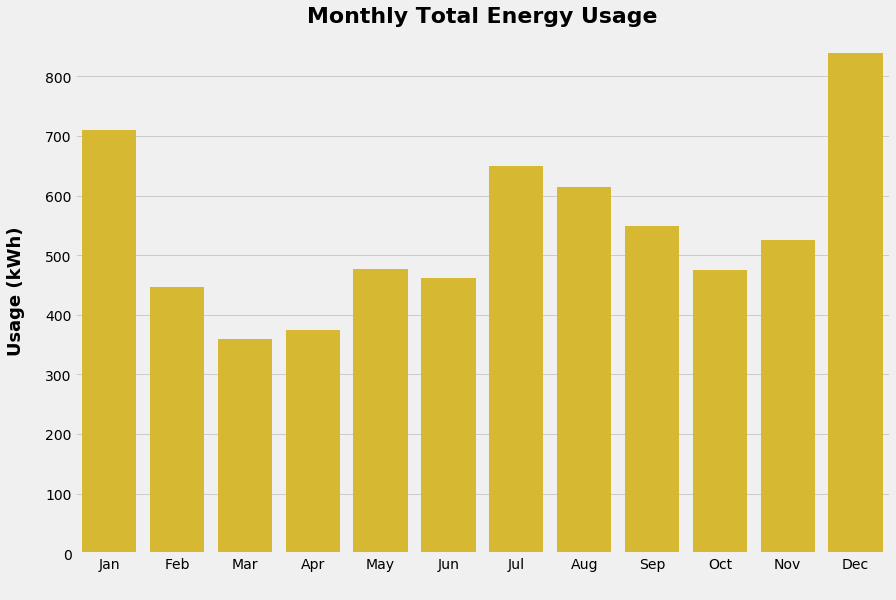

In [8]:
df = raw_df.copy()

# NOTE: list(range(24)) is a cheap way to say [0, 1, ... 23] which is
#           conveniently how we named our columns. ;)
df = df[df.date.dt.year == 2017].copy()
df['month'] = df.date.dt.month
df['month_name'] = df.date.apply(lambda x: x.strftime('%b'))
df['daily_total'] = df[list(range(24))].sum(axis=1)

fig, ax = plt.subplots(figsize=(13, 9))

monthly = df.groupby(['month', 'month_name'])\
            .daily_total.sum()\
            .reset_index(name='total')

ax = sns.barplot(
    x='month_name',
    y='total',
    data=monthly,
    color='#f1c917',
    ax=ax,
)

# Customize the plotted Ax
ax.set_title('Monthly Total Energy Usage', size=22, weight='bold')
ax.set_ylabel('Usage (kWh)', labelpad=20, size=18, weight='bold')
ax.set_xlabel(' ')

ax

I found this very surprising! I have a small apartment (roughly 800sqft) but I
not for a single month in 2017 did I ever go over 1000 kWh in usage! I do make
a concerted effort to restrict my energy usage, but there are some months where
I don't even break the 400 kWh mark, which I find insane.

Initially, I figured the the Season Pass plan would be the best offer for my
needs, considering how hot the Texas summers get as well as how I like to keep
my domain toasty (~74°) in the winter. I'm NOT a fan of being cold!! Overall
usage is leading me to believe that maybe the low fixed rate will be my best
option?

Let's calculate the averages of the various plans I'm considering. I'm
interested in seeing how they stack up to each other before any discounts are
considered.

In [9]:
def determine_cost(usage: float, *, plan_id: int) -> float:
    """
    Calculate the unbenefitted cost of a plan.
    
    For a given <plan_id> at a particular monthly <usage>, choose the
    appropriate rate level and calculate the plan's cost.
    """
    lowest_rate = 9999.0

    for idx, row in rates[rates.plan_id == plan_id].iterrows():
        if lowest_rate > row.rate:
            lowest_rate = row.rate

        if usage > row.usage:
            return round(usage * (row.rate / 100), 2)

    return round(usage * (lowest_rate / 100), 2)

df = raw_df.copy()
df = df[df.date.dt.year == 2017].copy()
df['month'] = df.date.dt.month
df['month_name'] = df.date.apply(lambda x: x.strftime('%b'))
df['daily_total'] = df[list(range(24))].sum(axis=1)

monthly = df.groupby(['month', 'month_name'])\
            .daily_total.sum()\
            .reset_index(name='total_usage')

for plan_id in rates.plan_id.unique():
    monthly[f'plan_{plan_id}_cost'] = monthly.total_usage.apply(determine_cost, plan_id=plan_id)

priced = monthly.drop(columns=['month', 'total_usage']).set_index('month_name').T.round(2)
priced['yearly_total'] = priced.sum(axis=1)
priced

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,yearly_total
plan_1_cost,105.10,57.22,45.98,47.89,60.97,59.11,96.24,90.93,81.25,60.93,77.91,124.12,907.65
plan_2_cost,105.10,57.22,45.98,47.89,60.97,59.11,96.24,90.93,81.25,60.93,77.91,124.12,907.65
plan_3_cost,102.97,55.88,44.91,46.77,59.54,57.72,94.29,89.09,79.61,59.50,76.33,121.60,888.21
plan_4_cost,84.51,48.73,39.16,40.78,51.92,50.33,77.38,73.11,65.33,51.88,62.65,99.80,745.58
plan_5_cost,90.19,37.55,30.18,31.43,40.01,38.79,82.59,78.03,69.72,39.98,66.86,106.51,711.84
plan_6_cost,76.69,33.98,27.30,28.44,36.20,35.09,70.23,66.35,59.29,36.18,56.86,90.57,617.18


Before moving on, I wanted to take a moment to talk about one of my [favorite
functions in the pandas library][pd-melt]. What it essentially does is take a
2D structure and smushes it down into a 1D frame.

---

```
pandas.melt(frame, id_vars=None, var_name=None, value_name='value')

	"Unpivots" a DataFrame from wide format to long format, optionally leaving
	identifier variables set.

	This function is useful to massage a DataFrame into a format where one or
	more columns are identifier variables (id_vars), while all other columns,
	considered measured variables (value_vars), are "unpivoted" to the row
	axis, leaving just two non-identifier columns, 'variable' and 'value'.

	frame: DataFrame
	id_vars: Column(s) to use as identifier variables.
	var_name: Name to use for the 'variable' column. If None it uses
				frame.columns.name or 'variable'.
	value_name: Name to use for the 'value' column.
```

We currently a frame that looks something like this ..

|             | Jan    | Feb   | Mar   | ... |
| ----------- | ------ | ----- | ----- | --- |
| plan_1_cost |	105.1  | 57.22 | 45.98 | ... |
| plan_2_cost |	105.1  | 57.22 | 45.98 | ... |
| plan_3_cost |	102.97 | 55.88 | 44.91 | ... |
| plan_4_cost |	84.51  | 48.73 | 39.16 | ... |
| plan_5_cost |	90.19  | 37.55 | 30.18 | ... |
| plan_6_cost |	76.69  | 33.98 | 27.3  | ... |

But that's no good when it comes time graph this up! Ideally, we'd like to have
a frame wher each plan-month combination gets listed out on as a single record.
Well, this is **exactly** what pd.melt helps us do! What we're basically going
to end with is this...

|       | plan        | month | price  |
| ----- | ----------- | ----- | ------ |
| 0	    | plan_1_cost | Jan   | 105.1  |
| 1	    | plan_2_cost | Jan   | 105.1  |
| 2	    | plan_3_cost | Jan   | 102.97 |
| 3	    | plan_4_cost | Jan   | 84.51  |
| 4	    | plan_5_cost | Jan   | 90.19  |
| 5	    | plan_6_cost | Jan   | 76.69  |
| ...   | ...         | ...   | ...    |


[pd-melt]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

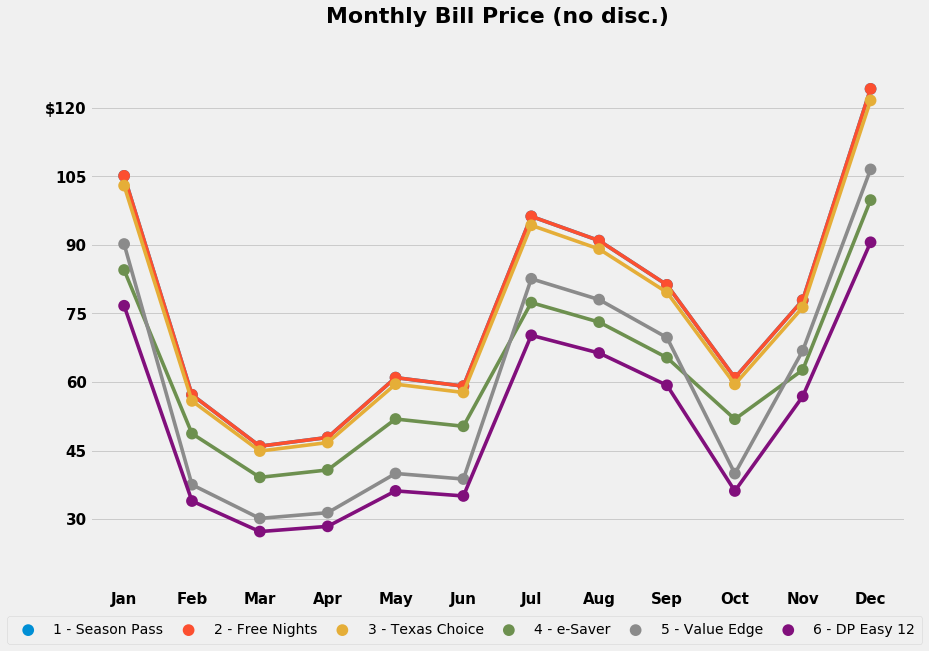

In [10]:
temp = pd.melt(
    priced.drop(columns=['yearly_total']).reset_index(),
    id_vars='index',
    var_name='month',
    value_name='price'
)

temp['id'] = temp['index'].apply(lambda v: int(v.split('_')[1]))
temp = temp.merge(plans, on='id')
temp['plan'] = temp.apply(lambda df: f'{df.id} - {df.plan_name}', axis=1)

fig, ax = plt.subplots(figsize=(13, 9))

ax = sns.pointplot(
    x='month',
    y='price',
    hue='plan',
    data=temp,
    scale=0.5,
    ax=ax
)

# Customize the plotted Ax
yticks = list(range(30, 130, 15))
ax.set_title('Monthly Bill Price (no disc.)', pad=40, size=22, weight='bold')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[:-1] + [f'${yticks[-1]}'], size=15, weight='bold')
ax.set_xticklabels(temp.month.tolist(), size=15, weight='bold')
ax.legend(title=None, loc=8, ncol=6, bbox_to_anchor=(0.46, -0.12),
          borderpad=.5, columnspacing=.8)
plt.ylim(ymin=15)

ax

Rather unsurpringly, the attractive-discount plans will cost more over the
course of the year if you don't consider their benefits. What I find interesting
is that now, even though the fixed rate seemed to be better from a cost
standpoint, for my energy needs, the $30/mo. benefit plan comes out ahead
**without even factoring in the benefit**. Granted I only had one month in 2017
where I actually hit the 800kWh threshold, but this is still an interesting find.

The next natural step we must take is to factor in the individual benefits for
each plan. Since there is a signficant level of variability in execution here,
we're going to have to start all the back with the raw data. ~~I think the easiest
way to solve this problem is to create various "flags", and then act on those
flags at a higher level.~~ I tried implementing this and got tired of trying to
make it work, so I'll just calculate each individual rate on a separate dataframe and
then stack 'em all together. Whatever! We'll eventually end back up with something
like we have in the cell above.

** just as a reminder, this is what our cleaned raw data looks like. We have the
    hours of the day going across the columns, the date of record as our
    row-header, and the amount of energy used (in kWh) as our data table's values.

In [11]:
plan_cost_dfs = []
raw_df.sort_values('date').head().reset_index(drop=True)

,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2016-10-01,0.556,1.047,1.039,0.895,0.732,1.020,0.751,0.560,0.745,...,0.827,0.483,1.484,1.445,1.036,0.957,0.861,0.589,1.419,0.795
1,2016-10-02,4.583,1.340,1.101,0.767,0.715,0.738,0.796,0.698,0.679,...,1.189,0.853,0.929,1.101,1.501,1.622,1.062,0.878,1.202,0.930
2,2016-10-03,0.337,0.317,0.340,0.598,0.343,0.680,0.666,0.773,1.201,...,0.343,0.343,0.344,0.864,1.026,1.392,0.762,0.753,0.706,1.012
3,2016-10-04,0.689,0.354,0.350,0.330,0.320,0.345,0.343,1.007,1.216,...,0.323,0.330,0.348,0.348,0.421,0.784,1.043,1.178,1.212,1.488
4,2016-10-05,0.580,0.316,0.348,0.349,0.347,0.338,0.629,0.340,1.111,...,0.604,0.327,0.326,0.351,0.354,0.591,1.357,1.618,1.052,0.852


### Common setup

In [12]:
df = raw_df.copy()
df = df[df.date.dt.year == 2017].copy()
df['month'] = df.date.dt.month
df['month_name'] = df.date.apply(lambda x: x.strftime('%b'))
df['daily_total'] = df[list(range(24))].sum(axis=1)

### Plan 1 - Season Pass
#### 50% off Dec/Jan/Feb & Jun/Jul/Aug months

In [13]:
def benefitted_cost_1(s: pd.Series) -> float:
    """
    Calculate the unbenefitted cost of a plan.
    
    We can easily just wrap determine_cost() here!
    """
    raw_cost = determine_cost(s.total_usage, plan_id=1)
    if s.month in (12, 1, 2, 6, 7, 8):
        discount = 0.5
    else:
        discount = 1.0  # No savings. :(
    return round(raw_cost * discount, 2) 

plan_1_df = df.copy()

monthly = plan_1_df.groupby(['month', 'month_name'])\
                   .daily_total.sum()\
                   .reset_index(name='total_usage')

monthly['plan_1_cost'] = monthly.apply(benefitted_cost_1, axis=1)
plan_1_cost = monthly.drop(columns=['month', 'total_usage']).set_index('month_name').T.round(2)
plan_cost_dfs.append(plan_1_cost)
plan_1_cost

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
plan_1_cost,52.55,28.61,45.98,47.89,60.97,29.56,48.12,45.46,81.25,60.93,77.91,62.06


### Plan 2 - Free Nights
#### Zeroed charges per kWh usage between 9pm and 6am.

In [14]:
def benefitted_cost_2(s: pd.Series) -> float:
    """
    Calculate the unbenefitted cost of a plan.
    
    We can easily just wrap determine_cost() here!
    """
    raw_cost = determine_cost(s.total_usage, plan_id=2)
    discount = 1 - (s.nightly_total / s.total_usage)
    return round(raw_cost * discount, 2)

def calculate_night_usage(s: pd.Series) -> float:
    """
    Sum up all night energy usage.
    """
    night_hours = [0, 1, 2, 3, 4, 5, 21, 22, 23]
    return s[night_hours].sum()

plan_2_df = df.copy()
plan_2_df['night_usage'] = plan_2_df[list(range(24))].apply(calculate_night_usage, axis=1)

# ASIDE:
#     On the TXU website, they give the statistic that customers
#     subscribing to this plan, on average get about 40% of their
#     electricity for free. I was curious to see how I'd stack up
#     to this claim!
#
plan_2_df['percentage_savings'] = plan_2_df.night_usage / plan_2_df.daily_total
round(plan_2_df.percentage_savings.mean(), 4) * 100
# == 38.18%

monthly = plan_2_df.groupby(['month', 'month_name'])\
                   [['night_usage', 'daily_total']].sum()\
                   .reset_index()\
                   .rename(columns={'night_usage': 'nightly_total',
                                    'daily_total': 'total_usage'})

monthly['plan_2_cost'] = monthly.apply(benefitted_cost_2, axis=1)
plan_2_cost = monthly.drop(columns=['month', 'total_usage', 'nightly_total']).set_index('month_name').T.round(2)
plan_cost_dfs.append(plan_2_cost)
plan_2_cost

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
plan_2_cost,68.25,37.2,31.27,31.86,39.33,34.46,54.27,47.79,45.46,37.37,49.01,82.44


### Plan 3 - 3% Cash Back
#### 3% Cash Back on annual charges via a Prepaid Visa.

In [15]:
def benefitted_cost_3(s: pd.Series) -> float:
    """
    Calculate the unbenefitted cost of a plan.
    
    We can easily just wrap determine_cost() here!
    """
    raw_cost = determine_cost(s.total_usage, plan_id=3)
    discount = 1 - 0.03
    return round(raw_cost * discount, 2)

plan_3_df = df.copy()

monthly = plan_3_df.groupby(['month', 'month_name'])\
                   .daily_total.sum()\
                   .reset_index(name='total_usage')

monthly['plan_3_cost'] = monthly.apply(benefitted_cost_3, axis=1)
plan_3_cost = monthly.drop(columns=['month', 'total_usage']).set_index('month_name').T.round(2)
plan_cost_dfs.append(plan_3_cost)
plan_3_cost

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
plan_3_cost,99.88,54.2,43.56,45.37,57.75,55.99,91.46,86.42,77.22,57.72,74.04,117.95


### Plan 5 - \$30 discount
#### If monthly usage is over 800 kWh, get $30 off your bill!

In [16]:
def benefitted_cost_5(s: pd.Series) -> float:
    """
    Calculate the unbenefitted cost of a plan.
    
    We can easily just wrap determine_cost() here!
    """
    raw_cost = determine_cost(s.total_usage, plan_id=5)
    if s.total_usage >= 800.0:
        discount = 30.0
    else:
        discount = 0
    return raw_cost - discount

plan_5_df = df.copy()

monthly = plan_5_df.groupby(['month', 'month_name'])\
                   .daily_total.sum()\
                   .reset_index(name='total_usage')

monthly['plan_5_cost'] = monthly.apply(benefitted_cost_5, axis=1)
plan_5_cost = monthly.drop(columns=['month', 'total_usage']).set_index('month_name').T.round(2)
plan_cost_dfs.append(plan_5_cost)
plan_5_cost

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
plan_5_cost,90.19,37.55,30.18,31.43,40.01,38.79,82.59,78.03,69.72,39.98,66.86,76.51


### Plan 4 & 6 - Fixed Rates
#### Enjoy a low rate all year long.

In [17]:
fixed_df = df.copy()

monthly = fixed_df.groupby(['month', 'month_name'])\
                  .daily_total.sum()\
                  .reset_index(name='total_usage')

for plan_id in [4, 6]:
    monthly[f'plan_{plan_id}_cost'] = monthly.total_usage.apply(determine_cost, plan_id=plan_id)

fixed_cost = monthly.drop(columns=['month', 'total_usage']).set_index('month_name').T.round(2)
plan_cost_dfs.append(fixed_cost)
fixed_cost

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
plan_4_cost,84.51,48.73,39.16,40.78,51.92,50.33,77.38,73.11,65.33,51.88,62.65,99.80
plan_6_cost,76.69,33.98,27.30,28.44,36.20,35.09,70.23,66.35,59.29,36.18,56.86,90.57


### Stick them all together.

In [18]:
benefitted = pd.concat(plan_cost_dfs).sort_index()
benefitted['yearly_total'] = benefitted.sum(axis=1)
benefitted

month_name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,yearly_total
plan_1_cost,52.55,28.61,45.98,47.89,60.97,29.56,48.12,45.46,81.25,60.93,77.91,62.06,641.29
plan_2_cost,68.25,37.20,31.27,31.86,39.33,34.46,54.27,47.79,45.46,37.37,49.01,82.44,558.71
plan_3_cost,99.88,54.20,43.56,45.37,57.75,55.99,91.46,86.42,77.22,57.72,74.04,117.95,861.56
plan_4_cost,84.51,48.73,39.16,40.78,51.92,50.33,77.38,73.11,65.33,51.88,62.65,99.80,745.58
plan_5_cost,90.19,37.55,30.18,31.43,40.01,38.79,82.59,78.03,69.72,39.98,66.86,76.51,681.84
plan_6_cost,76.69,33.98,27.30,28.44,36.20,35.09,70.23,66.35,59.29,36.18,56.86,90.57,617.18


### And the winner is ... **Plan 2 - *Free Nights***!

There actually might be a hidden bonus to plan #2 in that I should be able to
get nine consecutive hours of free energy, and the page states that it could
start at 8, 9, or 10 PM. Going back up to the heatmap I generated at the very
beginning, it appears I could probably eek out juuust a little bit more from
this plan by starting at 8pm.

Bonus visuals below! Thanks for joining me in this exercise!

:~)

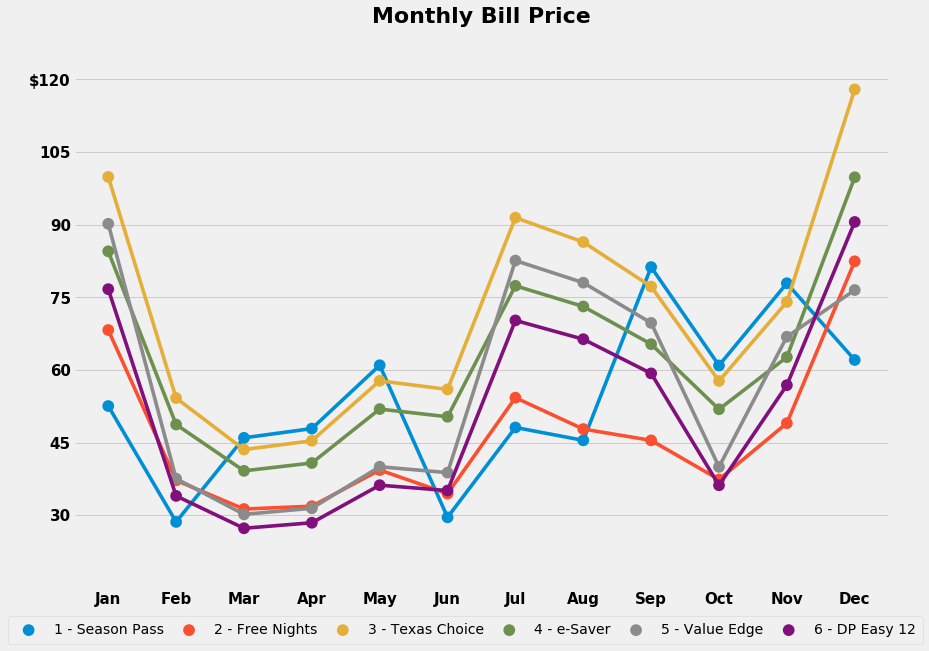

In [19]:
temp = pd.melt(
    benefitted.drop(columns=['yearly_total']).reset_index(),
    id_vars='index',
    var_name='month',
    value_name='price'
)

temp['id'] = temp['index'].apply(lambda v: int(v.split('_')[1]))
temp = temp.merge(plans, on='id')
temp['plan'] = temp.apply(lambda df: f'{df.id} - {df.plan_name}', axis=1)

# Reset our Figure to defaults
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(13, 9))

# Plot our Figure
ax = sns.pointplot(
    x='month',
    y='price',
    hue='plan',
    data=temp,
    scale=0.5,
    ax=ax
)

# Customize the plotted Ax
yticks = list(range(30, 130, 15))
ax.set_title('Monthly Bill Price', pad=40, size=22, weight='bold')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[:-1] + [f'${yticks[-1]}'], size=15, weight='bold')
ax.set_xticklabels(temp.month.tolist(), size=15, weight='bold')
ax.legend(title=None, loc=8, ncol=6, bbox_to_anchor=(0.48, -0.12),
          borderpad=.5, columnspacing=.8)
plt.ylim(ymin=15)

ax

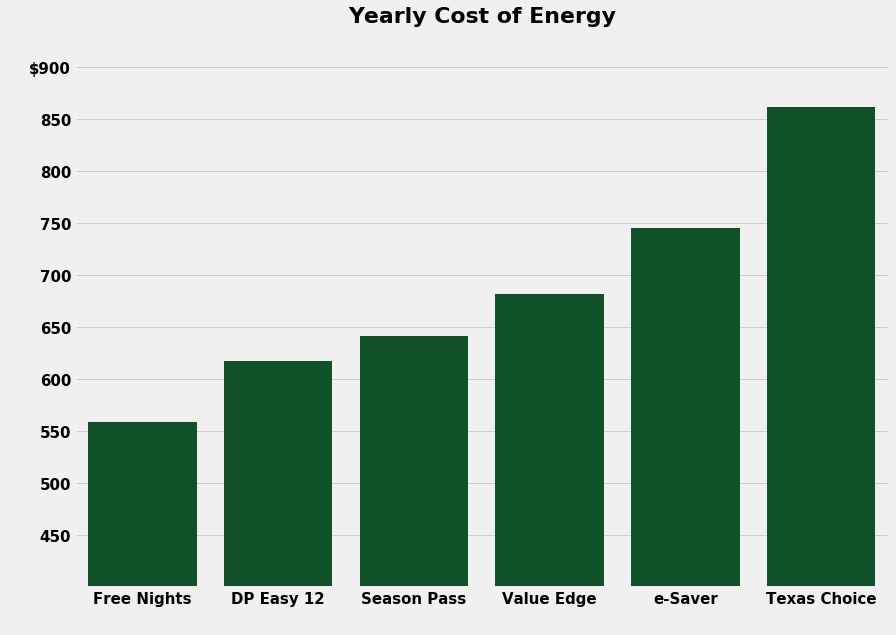

In [20]:
temp = pd.melt(
    benefitted['yearly_total'].reset_index(),
    id_vars='index',
    value_name='price'
)

temp['id'] = temp['index'].apply(lambda v: int(v.split('_')[1]))
temp = temp.merge(plans, on='id')
temp['plan'] = temp.apply(lambda df: f'{df.id} - {df.plan_name}', axis=1)
temp = temp.sort_values('price')

# Reset our Figure to defaults
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(13, 9))

ax = sns.barplot(
    x='plan',
    y='price',
    data=temp,
    color='#065C27',
    ax=ax,
)

yticks = list(range(450, 901, 50))
ax.set_title('Yearly Cost of Energy', pad=40, size=22, weight='bold')
ax.set_ylabel(' ')
ax.set_xlabel(' ')
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[:-1] + [f'${yticks[-1]}'], size=15, weight='bold')
ax.set_xticklabels(temp.plan_name.tolist(), size=15, weight='bold')
plt.ylim(ymin=400)

ax